In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from dataloading.nvidia import NvidiaDataset
from velocity_model import VelocityModel

%load_ext autoreload
%autoreload 2


In [4]:
velocity_model = VelocityModel(positions_parquet='summer2021-positions.parquet')
speed, distance = velocity_model.find_speed_for_position(8454., 15490., 1.95)
speed

8.009431966532162

/home/romet/data2/datasets/rally-estonia/dataset-new-small/summer2021/2021-10-26-10-49-06_e2e_rec_ss20_elva: lenght=33045, filtered=0
Error mean: 0.03974737826188884, max: 3.0019719320690545


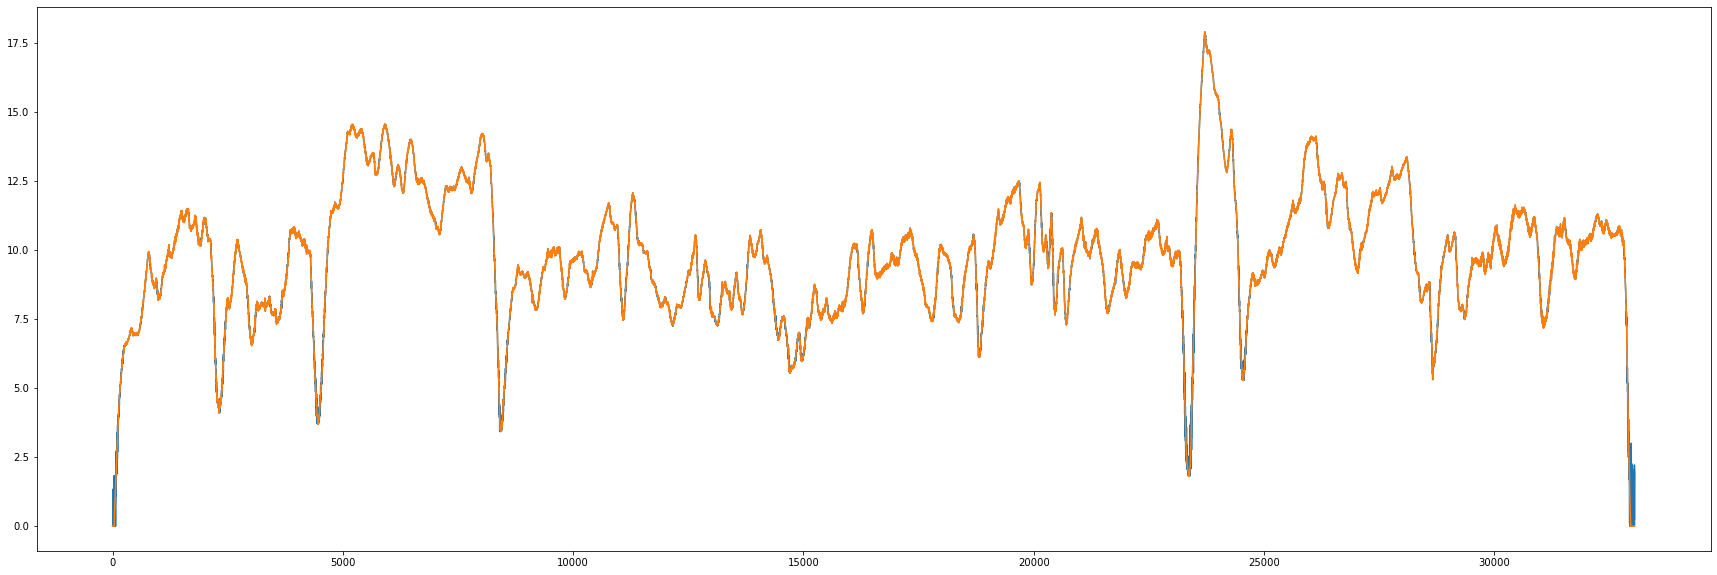

In [5]:
root_path = Path('/home/romet/data2/datasets/rally-estonia/dataset-new-small/summer2021')
test_df = NvidiaDataset([root_path / "2021-10-26-10-49-06_e2e_rec_ss20_elva"], camera="front_wide", transform=None).frames

x = test_df["position_x"] + np.random.normal(0, 0.5, len(test_df))
y = test_df["position_y"] + np.random.normal(0, 0.5, len(test_df))
yaw = test_df["yaw"] + np.random.normal(0, 0.1, len(test_df))

result_df = pd.DataFrame(data={'x': x, 'y': y, 'yaw': yaw})
result_df['vehicle_speed'] = result_df.apply(lambda x: velocity_model.find_speed_for_position(x['x'], x['y'], x['yaw'])[0], axis=1)
result_df["error"] = np.abs(result_df["vehicle_speed"] - test_df["vehicle_speed"])
print(f"Error mean: {result_df.error.mean()}, max: {result_df.error.max()}")

plt.figure(figsize=(30, 10))
plt.plot(result_df["vehicle_speed"])
plt.plot(test_df["vehicle_speed"])

/home/romet/data2/datasets/rally-estonia/dataset-new-small/summer2021/2021-10-26-11-08-59_e2e_rec_ss20_elva_back: lenght=33281, filtered=0
Error mean: 0.03794118137600579, max: 2.4388401563095408


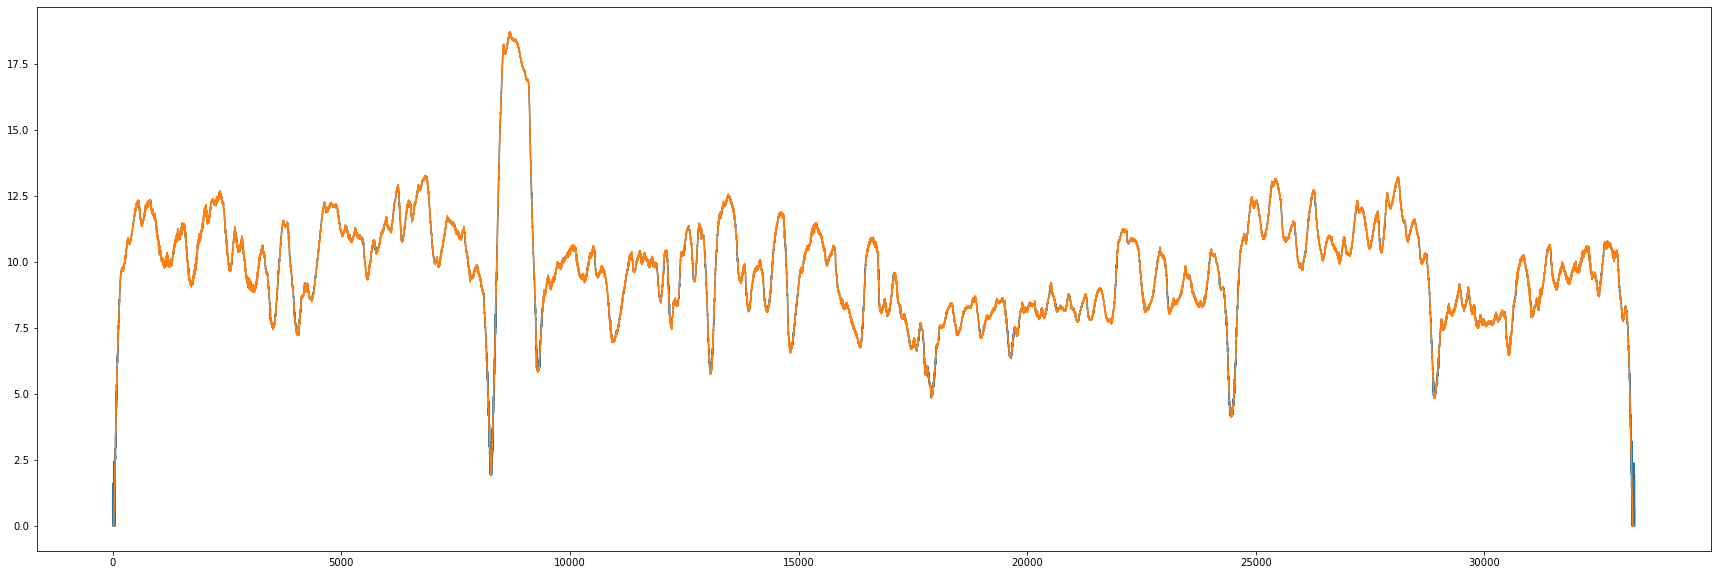

In [6]:
test_df = NvidiaDataset([root_path / "2021-10-26-11-08-59_e2e_rec_ss20_elva_back"], camera="front_wide", transform=None).frames

x = test_df["position_x"] + np.random.normal(0, 0.5, len(test_df))
y = test_df["position_y"] + np.random.normal(0, 0.5, len(test_df))
yaw = test_df["yaw"] + np.random.normal(0, 0.1, len(test_df))

result_df = pd.DataFrame(data={'x': x, 'y': y, 'yaw': yaw})
result_df['vehicle_speed'] = result_df.apply(lambda x: velocity_model.find_speed_for_position(x['x'], x['y'], x['yaw'])[0], axis=1)
result_df["error"] = np.abs(result_df["vehicle_speed"] - test_df["vehicle_speed"])
print(f"Error mean: {result_df.error.mean()}, max: {result_df.error.max()}")

plt.figure(figsize=(30, 10))
plt.plot(result_df["vehicle_speed"])
plt.plot(test_df["vehicle_speed"])